<a href="https://colab.research.google.com/github/sujal0311/gold-price-prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
#loading csv datasets
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# print first 5 rows in the datafram
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking for any missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#looking for the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#studying the correlation to study relation between each other
correlation = gold_data.corr()

<ipython-input-12-82f19ecc02e5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

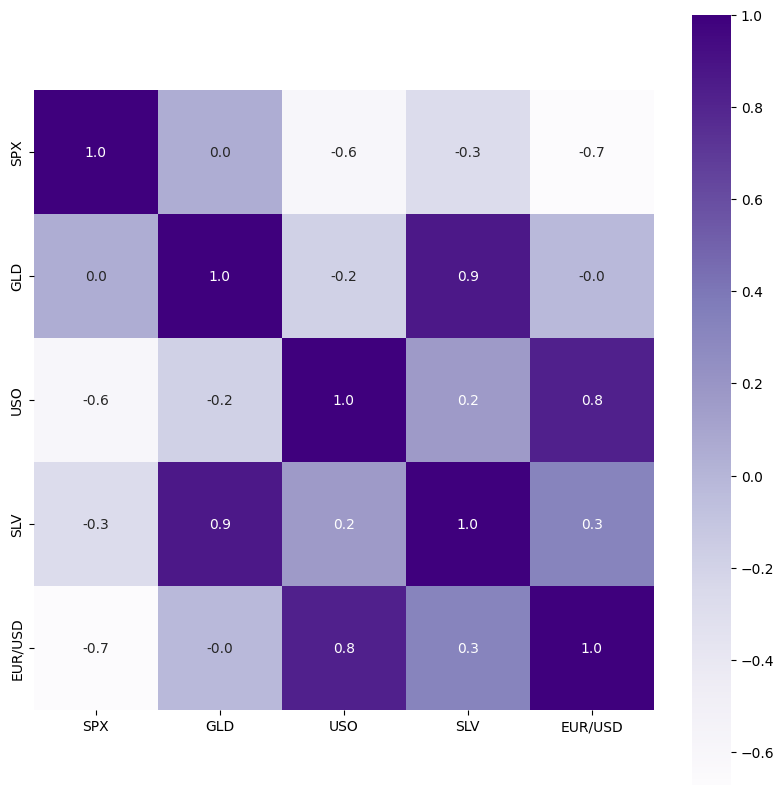

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,cmap='Purples')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-15-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

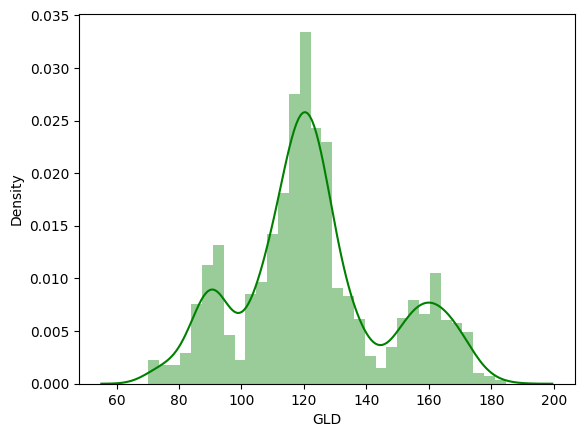

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Data Splitting

In [ ]:
#Now we will split our data and target
# In X axis we will take SPX,SLV,EUR/USD,USO
#In Y axis we will take GLD as our target
X=gold_data.drop(['Date','GLD'],axis=1) # as it is in  the column
Y=gold_data['GLD']


In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training:
Random Forest Regressor

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[168.80979984  82.16479972 115.9671001  127.72990059 120.56160166
 154.73619781 150.36359855 126.12870025 117.57529871 126.04980069
 116.64050101 172.34410094 142.10809852 167.78989852 115.17889949
 117.57880043 140.74330232 170.05950078 159.17190231 157.9260996
 155.19620017 125.18880013 175.99789973 157.13450319 125.25990039
  93.78379965  78.32410003 120.44500046 119.10619945 167.57059968
  88.06960025 125.45090013  91.10540081 117.75669995 121.16779915
 136.5338012  115.53920116 115.0077007  147.79289899 107.26780109
 104.30460256  87.17929824 126.54400072 118.05409976 153.87769899
 119.67720016 108.27940006 108.22269873  93.19640091 127.20579758
  74.9364005  113.70579949 121.40590013 111.32439929 118.7783991
 120.72109967 159.60450033 168.00080155 147.11129699  85.80519842
  94.27090034  86.94089882  90.38060011 118.87760076 126.43350095
 127.42929995 169.44390064 122.28629946 117.30509897  98.30950059
 168.72100194 143.14709846 132.22130287 121.17150208 120.99479965
 119.5650007

In [ ]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R square error is : ",error_score)

R square error is :  0.9891547918398415


Plotting a graph to compare Actual and Predicted values


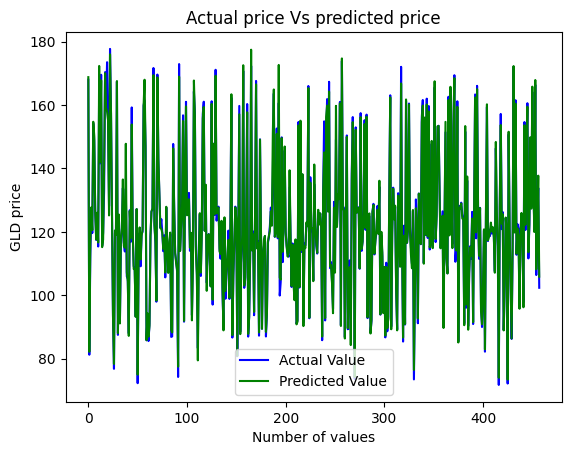

In [ ]:
Y_test = list(Y_test)
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual price Vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()